In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import random
import pandas as pd
%matplotlib inline

In [58]:
# df = pd.read_csv('data_set-1a/Train-10.csv')
# data = []
# target = []
# for index, row in df.iterrows():
#     data.append([row['input1'],row['input2']])
#     target.append(row['output'])# Convert the Series to a list and append it to 'data'
    
# df = pd.read_csv('data_set-1a/Test-10.csv')
# data_test = []
# target_test = []
# for index, row in df.iterrows():
#     data_test.append([row['input1'],row['input2']])
#     target_test.append(row['output'])
    
# df = pd.read_csv('data_set-1a/Val-10.csv')   
# data_valid=[]
# target_valid=[]
# for index, row in df.iterrows():
#     data_valid.append([row['input1'],row['input2']])
#     target_valid.append(row['output'])

In [59]:
df = pd.read_csv('data_set-1b/Train-10.csv')
data = []
target = []
for index, row in df.iterrows():
    data.append([row['x1'],row['x2']])
    target.append(row['label'])# Convert the Series to a list and append it to 'data'
    
df = pd.read_csv('data_set-1b/Test-10.csv')
data_test = []
target_test = []
for index, row in df.iterrows():
    data_test.append([row['x1'],row['x2']])
    target_test.append(row['label'])
    
df = pd.read_csv('data_set-1b/Val-10.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    data_valid.append([row['x1'],row['x2']])
    target_valid.append(row['label'])

In [60]:
def dist(xi,x):
    d = len(xi)
    sum = 0.0
    for i in range(d):
        sum = sum + ((xi[i]-x[i])**2)
    return sum

In [61]:
def calculate_mean(vectors):
    n =len(vectors)
    d = len(vectors[0])
    sumvec = [0]*d
    for i in range(d):
        for j in range(n):
            sumvec[i] += vectors[j][i]
    for i in range(d):
        sumvec[i] = sumvec[i]/n
    return sumvec

In [62]:
def findmaxlabel(Knn,target,data):
    frequency = {}
    for tup in Knn:
        if target[tup[1]] in frequency:
            frequency[target[tup[1]]]+=1
        else:
            frequency[target[tup[1]]]=1
    max_freq = 0
    for freq in frequency.values():
        if freq > max_freq:
            max_freq = freq
            
    competingLabel = []
    for label, freq in frequency.items():
        if freq == max_freq:
            competingLabel.append(label)
    if len(competingLabel)==1:
        return competingLabel[0]
    else:
        averagex=[]
        i=0
        for label in competingLabel:
            allx=[]
            for tup in Knn:
                if label==target[tup[1]]:
                    allx.append(data[tup[1]])
            
            averagex.append((calculate_mean(allx),i))
            i=i+1
        averagex.sort()
        return competingLabel[averagex[0][1]]

In [63]:
def calculate_label(x,K,data,target):
    dist_label = []
    N = len(data)
    for i in range(N):
        newtup = (dist(data[i],x),i)
        dist_label.append(newtup)
    dist_label.sort()
    Knn = []
    for i in range(K):
        Knn.append(dist_label[i])
    label = findmaxlabel(Knn,target,data)
    return label

    

In [64]:
def KNN(K,data,target,data_valid):
    actual_valid = []
    for x in data_valid:
        label = calculate_label(x,K,data,target)
        actual_valid.append(label)
    # print(actual_valid)
    return actual_valid

In [65]:
def numofmatches(act,exp):
    matches=0
    for i in range(len(act)):
        if act[i]==exp[i]:
            matches+=1
    return matches

238 number of labels matched out of 238


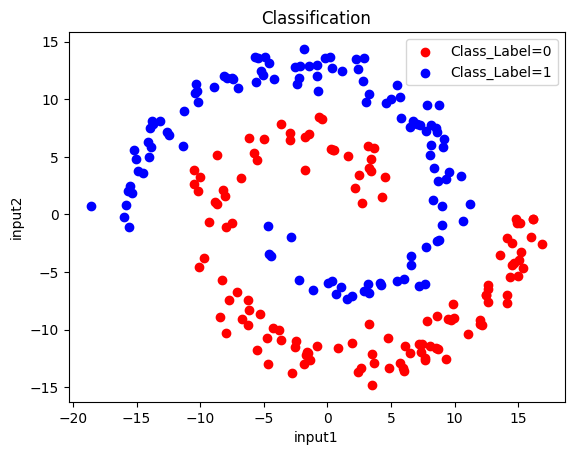

238 number of labels matched out of 238


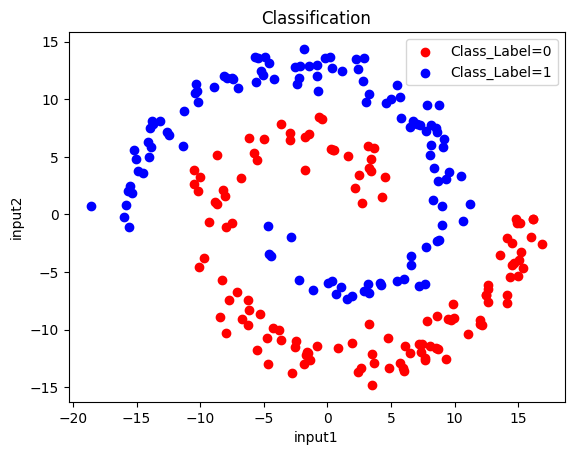

238 number of labels matched out of 238


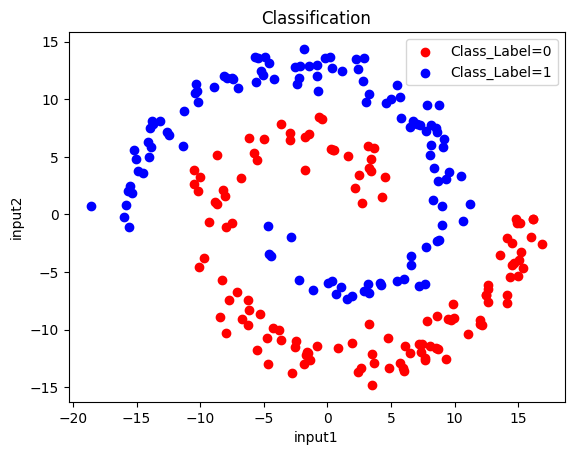

for best K 1
120 number of labels matched out of 120
842
842


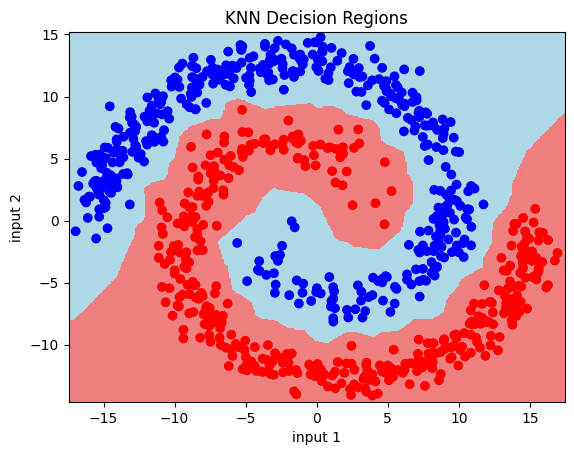

In [66]:
allK = [1,7,15]
N = len(data)
bestk=1
maxfrac=0
for K in allK:
    actual_valid = KNN(K,data,target,data_valid)
    frac = numofmatches(actual_valid,target_valid)
    if frac>maxfrac:
        maxfrac=frac
        bestk=K
    num = len(actual_valid)
    print(f"{frac} number of labels matched out of {num}")
    class1=[]
    class2=[]
    for i in range(len(actual_valid)):
        if actual_valid[i]==0:
            class1.append(i)
        else:
            class2.append(i)
    input11=[]
    input21=[]
    input12=[]
    input22=[]
    for i in class1:
        input11.append(data_valid[i][0])
        input21.append(data_valid[i][1])
    for i in class2:
        input12.append(data_valid[i][0])
        input22.append(data_valid[i][1])

        
    plt.scatter(input11, input21, color='red', label='Class_Label=0')
    plt.scatter(input12, input22, color='blue', label='Class_Label=1')
    plt.xlabel('input1')
    plt.ylabel('input2')
    plt.legend()
    plt.title('Classification')
    plt.show()
# print(actual_valid)
print(f"for best K {bestk}")
actual_test = KNN(K,data,target,data_test)
frac = numofmatches(actual_test,target_test)
num = len(actual_test)
print(f"{frac} number of labels matched out of {num}")

input1=[]
input2=[]
for i in range(len(data)):
    input1.append(data[i][0])
    input2.append(data[i][1])
print(len(input1))
print(len(input2))
    
x_min, x_max = min(input1) - 0.5, max(input1) + 0.5
y_min, y_max = min(input2) - 0.5, max(input2) + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([calculate_label([x,y],bestk,data,target) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue'])    # Bold colors for data points

plt.contourf(xx, yy, Z, cmap=cmap_light)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Regions")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()


In [67]:
def mean(data):
    sum = [0]*(len(data[0]))
    for i in range(len(data[0])):
        for x in data:
            sum[i] = sum[i] + x[i]
    for i in range(len(sum)):
        sum[i] = sum[i]/(len(data))
    return sum

In [68]:
def M_means(data,M):
    N = len(data)
    z = []
    for i in range(M):
        dd = []
        for j in range(N):
            dd.append(0)
        z.append(dd)
    
    mus = []
    for i in range(M):
        z[i][i] = 1
        mus.append(data[i])
    temp = z
    for n in range(N):
        mini = 0
        minival = float('inf')
        for i in range(M):
            veclen = dist(data[n],mus[i])
            if veclen<minival:
                mini = i
                minival = veclen
        for i in range(M):
            if i==mini:
                z[i][n]=1
            else:
                z[i][n]=0
    for i in range(M):
        clusterdata =[]
        for j in range(N):
            if z[i][j]==1:
                clusterdata.append(data[j])
        mus[i] = mean(clusterdata)
    
    while temp!=z:
        temp = z
        for n in range(len(data)):
            mini = 0
            minival = float('inf')
            for i in range(M):
                veclen = 0
                for j in range(len(data[n])):
                    veclen+=((data[n][j]-mus[i][j])**2)
                if veclen<minival:
                    mini = i
            for i in range(M):
                if i==mini:
                    z[i][n]=1
                else:
                    z[i][n]=0
        for i in range(M):
            clusterdata =[]
            for j in range(len(z[i])):
                if z[i][j]==1:
                    clusterdata.append(data[j])
            mus[i] = mean(clusterdata)
    return mus
        

In [69]:
def find_label_KNNREP(x,muumat):
    l = len(muumat)
    M = len(muumat[0])
    mini=0
    minj=0
    mindis = float('inf')
    for i in range(l):
        for j in range(M):
            distance = dist(x,muumat[i][j])
            if distance<mindis:
                mindis = distance
                mini = i
                minj = j
    return mini

842
842


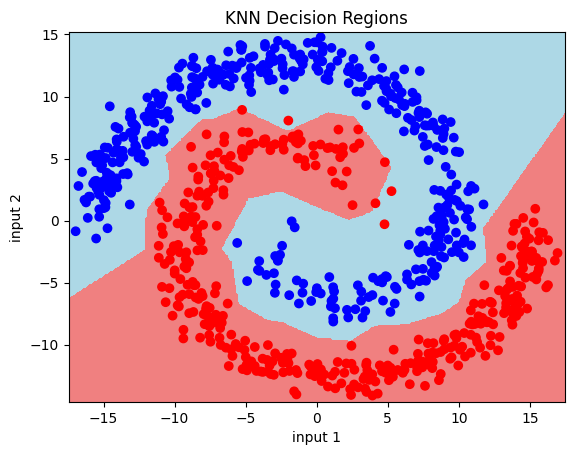

In [82]:
allclass = list(set(target))
data_each_class = []
for i in range(len(allclass)):
    data_curr_class = []
    for j in range(len(data)):
        if target[j] == i:
            data_curr_class.append(data[j])
    data_each_class.append(data_curr_class)

M = 20
muumat = []
for i in range(len(allclass)):
    muumat.append(M_means(data_each_class[i],M))

result_test = []
for x in data_test:
    result_test.append(find_label_KNNREP(x,muumat))

input1=[]
input2=[]
for i in range(len(data)):
    input1.append(data[i][0])
    input2.append(data[i][1])
print(len(input1))
print(len(input2))
    
x_min, x_max = min(input1) - 0.5, max(input1) + 0.5
y_min, y_max = min(input2) - 0.5, max(input2) + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_label_KNNREP([x,y],muumat) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue'])    # Bold colors for data points

plt.contourf(xx, yy, Z, cmap=cmap_light)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Regions")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()



In [71]:
def find_cov_mat(data,mean):
    d = len(mean)
    result = [[0 for _ in range(d)] for _ in range(d)]
    for x in data:
        data1 = np.array(x)
        mean1 = np.array(mean)
        diff = data1 - mean1
        if diff.ndim == 1:
            diff = diff.reshape(-1, 1)
        
        mult = diff@np.transpose(diff)
        result = result + mult
        # print(result)
        # print("before division")
        
    for i in range(d):
        for j in range(d):
            result[i][j] = result[i][j]/(len(data))
    return result

In [72]:
def find_normal(x,mymean,mycov):
    x1 = np.array(x)
    diff = x1-mymean
    if diff.ndim == 1:
        diff = diff.reshape(-1, 1)
    diff_trans = np.transpose(diff)
    cov_inverse = np.linalg.inv(mycov)
    # print(diff.shape)
    # print(cov_inverse.shape)
    # print(diff_trans.shape)
    mat = diff_trans@cov_inverse
    mat = mat@diff
    value = mat[0][0]/2
    value = -value
    expo = math.exp(value)
    twopi = 2*(math.pi)
    twopi = twopi**(len(x)/2)
    mycov_det = np.linalg.det(mycov)
    mycov_det = mycov_det**(0.5)
    result = expo/twopi
    result = result/mycov_det
    return result
    
    

In [73]:
def find_bayes_label(x,allclass,data_each_class,allmean,prob_class,allcov):
    all_prob_Y_x = []
    for i in range(len(allclass)):
        normalprob = find_normal(x,allmean[i],allcov[i])
        prob_Yi_x = normalprob*prob_class[i]
        all_prob_Y_x.append(prob_Yi_x)
    maxi = 0
    for i in range(len(allclass)):
        if all_prob_Y_x[i]>all_prob_Y_x[maxi]:
            maxi = i
    return maxi

In [74]:
def bayes(allclass,data_each_class,allmean,prob_class,allcov,data_find):
    result_label = []
    for x in data_find:
        result_label.append(find_bayes_label(x,allclass,data_each_class,allmean,prob_class,allcov))
    return result_label

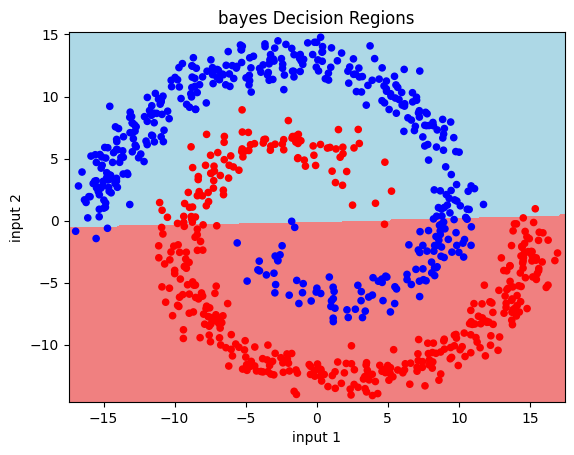

In [75]:
allclass = list(set(target))
data_each_class = []
for i in range(len(allclass)):
    data_curr_class = []
    for j in range(len(data)):
        if target[j] == i:
            data_curr_class.append(data[j])
    data_each_class.append(data_curr_class)
allmean = []
prob_class = []
for i in range(len(allclass)):
    allmean.append(mean(data_each_class[i]))
    prob_class.append(len(data_each_class[i])/len(data))
allcov = []
for i in range(len(allclass)):
    allcov.append(find_cov_mat(data_each_class[i],allmean[i]))

# labelx = find_bayes_label([8.6457252406,-12.3994173272],allclass,data_each_class,allmean,prob_class,allcov)
input1 = [x[0] for x in data]
input2 = [x[1] for x in data]

x_min, x_max = min(input1) - 0.5, max(input1) + 0.5
y_min, y_max = min(input2) - 0.5, max(input2) + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,allcov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue'])    # Bold colors for data points

plt.contourf(xx, yy, Z,levels=20, cmap=cmap_light)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold, s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("bayes Decision Regions")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()


In [76]:
def find_cov_mat_naive(data,mymean):
    d = len(mymean)
    result = [[0 for _ in range(d)] for _ in range(d)]
    for i in range(d):
        for x in data:
            result[i][i]+=((x[i]-mymean[i])**2)
        result[i][i]/=(len(data))
    return result
    

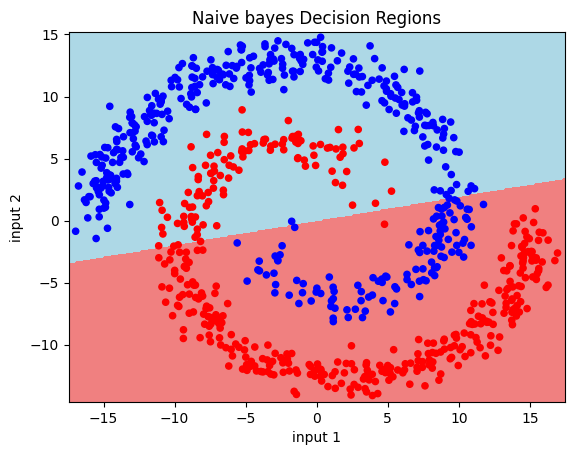

In [77]:
allclass = list(set(target))
d = len(data[0])
data_each_class = []
for i in range(len(allclass)):
    data_curr_class = []
    for j in range(len(data)):
        if target[j] == i:
            data_curr_class.append(data[j])
    data_each_class.append(data_curr_class)
allmean = []
prob_class = []
for i in range(len(allclass)):
    allmean.append(mean(data_each_class[i]))
    prob_class.append(len(data_each_class[i])/len(data))
allcov = []
for i in range(len(allclass)):
    allcov.append(find_cov_mat_naive(data_each_class[i],allmean[i]))

input1 = [x[0] for x in data]
input2 = [x[1] for x in data]

x_min, x_max = min(input1) - 0.5, max(input1) + 0.5
y_min, y_max = min(input2) - 0.5, max(input2) + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Flatten the mesh grid for easy iteration
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class labels for each point in the mesh grid using your custom KNN function
Z = np.array([find_bayes_label([x,y],allclass,data_each_class,allmean,prob_class,allcov) for x, y in mesh_points])
Z = Z.reshape(xx.shape)

# Plotting the decision regions
cmap_light = ListedColormap(['lightcoral', 'lightblue'])  # Light colors for decision regions
cmap_bold = ListedColormap(['red', 'blue'])    # Bold colors for data points

plt.contourf(xx, yy, Z,levels=20, cmap=cmap_light)  # Plot decision regions

# Scatter plot for the original points
plt.scatter(input1, input2, c=target, cmap=cmap_bold, s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive bayes Decision Regions")
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.show()